(60000, 28, 28, 1)
(60000, 10)
(10000, 10)


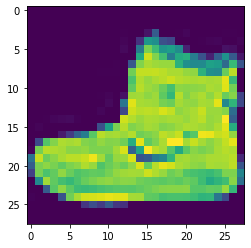

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# data
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# x : reshape
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape)                                      # (60000, 28, 28, 1)

# y : one hot encoding
y_train = to_categorical(y_train) 
y_test = to_categorical(y_test)
print(y_train.shape)                                      # (60000, 10)
print(y_test.shape)                                       # (10000, 10)

plt.imshow(x_train[0,:,:,0])
plt.show()

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

In [3]:
# CNN model sequential
model = Sequential()
model.add(Conv2D(100, (3, 3), input_shape = (28, 28, 1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 3))
model.add(Dropout(0.2))
model.add(Conv2D(80, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 3))
model.add(Dropout(0.2))
model.add(Conv2D(60, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 3))
model.add(Dropout(0.2))
model.add(Conv2D(40, (3, 3), padding = 'same', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Conv2D(20, (3, 3), padding = 'same', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 100)       1000      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 100)         0         
_________________________________________________________________
dropout (Dropout)            (None, 9, 9, 100)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 80)          72080     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 80)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 80)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 60)          4

In [15]:
# fit
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 50, batch_size = 64,
         validation_split = 0.2, shuffle = True, verbose =2 )

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 - 51s - loss: 1.0605 - accuracy: 0.5997 - val_loss: 0.5088 - val_accuracy: 0.8117
Epoch 2/50
48000/48000 - 51s - loss: 0.5601 - accuracy: 0.7977 - val_loss: 0.4133 - val_accuracy: 0.8421
Epoch 3/50
48000/48000 - 52s - loss: 0.4859 - accuracy: 0.8285 - val_loss: 0.3742 - val_accuracy: 0.8684
Epoch 4/50
48000/48000 - 51s - loss: 0.4500 - accuracy: 0.8419 - val_loss: 0.3242 - val_accuracy: 0.8828
Epoch 5/50
48000/48000 - 53s - loss: 0.4178 - accuracy: 0.8544 - val_loss: 0.3075 - val_accuracy: 0.8873
Epoch 6/50
48000/48000 - 52s - loss: 0.4020 - accuracy: 0.8610 - val_loss: 0.3018 - val_accuracy: 0.8926
Epoch 7/50
48000/48000 - 54s - loss: 0.3915 - accuracy: 0.8659 - val_loss: 0.2995 - val_accuracy: 0.8892
Epoch 8/50
48000/48000 - 50s - loss: 0.3792 - accuracy: 0.8704 - val_loss: 0.2828 - val_accuracy: 0.8950
Epoch 9/50
48000/48000 - 49s - loss: 0.3672 - accuracy: 0.8733 - val_loss: 0.2838 - val_accuracy: 0.8987
Epoch

In [17]:
# evaluate
loss, acc = model.evaluate(x_test, y_test, batch_size=64, verbose=2)
print('loss :', loss)
print('acc :', acc)

10000/1 - 3s - loss: 0.2980 - accuracy: 0.9107
loss : 0.27662566447257997
acc : 0.9107


In [ ]:
# DNN model sequential
model = Sequential()
model.add(Dense(200, activation = 'relu',  input_shape = (28*28, )))
model.add(Dropout(0.2))
model.add(Dense(150, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(80, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(70, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(60, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

# earlystopping
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_loss', mode = 'auto', patience = 50, verbose = 1)

# fit
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
model.fit(x_train, y_train, epochs = 200, batch_size = 256, callbacks = [es],
          validation_split = 0.2, shuffle = True, verbose = 2)

# evaluate
loss, acc = model.evaluate(x_test, y_test, batch_size = 256)
print('loss: ', loss)
print('acc: ', acc)

In [ ]:
# LSTM model sequential
from tensorflow.keras.layers import LSTM
model = Sequential()
model.add(LSTM(30, activation = 'relu', input_shape = (28, 28)))
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(70, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(40, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(20, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.summary()

# fit
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
model.fit(x_train, y_train, epochs = 100, batch_size =64,
          validation_split =0.2, shuffle = True, verbose = 2)

# evaluate
loss, acc = model.evaluate(x_test, y_test, batch_size =64)
print('loss: ', loss)
print('acc: ', acc)